In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes
from IPython.display import display

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


$$\text{Gradient Boosting Regressor}$$

In [3]:
class GradientBoostingRegressor():
    def __init__(self, n_trees = 1, max_depth = 3, eta = 1, random_state = 42):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.random_state = random_state
        self.eta = eta                      #learning rate
        
    def bias(self, y, z):
        return (y - z)
    
    def mse(self, y, y_pred):
        return (sum((y - y_pred)**2)) / len(y)
            
    def predict(self, X):         
        return np.array([sum([self.eta * coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coeffs)]) for x in X])
        
    
    def fit(self, X_train, X_test, y_train, y_test):
        self.coeffs = np.ones(self.n_trees)
        
        self.trees = []                
        self.train_errors = []
        self.test_errors = []       
        
        
        tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
        tree.fit(X_train, y_train)        
        self.train_errors.append(self.mse(y_train, self.predict(X_train)))
        self.test_errors.append(self.mse(y_test, self.predict(X_test)))        
        self.trees.append(tree)
        
        for _ in range(1, self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            
            tree.fit(X_train, self.bias(y_train, self.predict(X_train)))            
            
            self.train_errors.append(self.mse(y_train, self.predict(X_train)))
            self.test_errors.append(self.mse(y_test, self.predict(X_test)))   
            
            self.trees.append(tree)
        self.train_errors = np.array(self.train_errors)
        self.test_errors = np.array(self.test_errors)
        
        

$$\text{Mastering Scikit-Learn estimator of Gradient Boosting Regressor}$$

In [7]:
from sklearn.base import BaseEstimator

class GradientBoostingRegressor_SKL(BaseEstimator):
    def __init__(self, n_trees = 1, max_depth = 3, eta = 1, random_state = 42):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.random_state = random_state
        self.eta = eta                      #learning rate        
    def bias(self, y, z):
        return (y - z)
    
    def score(self, X, y):
        """
        returns MSE with the opposite sign
        """
        y_pred = self.predict(X)
        return -sum((y-y_pred)**2)/len(y)
            
    def predict(self, X):         
        return np.array([sum([self.eta * coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coeffs)]) for x in X])
        
    
    def fit(self, X, y):
        self.coeffs = np.ones(self.n_trees)
        self.trees = []
        
        tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
        tree.fit(X, y)          
        self.trees.append(tree)
        
        for _ in range(1, self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            
            tree.fit(X, self.bias(y, self.predict(X)))
            self.trees.append(tree)
        
        

$$\text{Stochastic Gradient Boosting Regressor}$$

In [57]:
class StochasticGradientBoostingRegressor():
    def __init__(self, n_trees = 1, max_depth = 3, eta = 1, sample_size = 0.5, random_state = 42):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.random_state = random_state
        self.eta = eta                      #learning rate
        self.sample_size = sample_size
   
        
    def bias(self, y, z):
        return (y - z)
    
    def mse(self, y, y_pred):
        return (sum((y - y_pred)**2)) / len(y)
            
    def predict(self, X):         
        return np.array([sum([self.eta * coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coeffs)]) for x in X])
        
    
    def get_subsample(self, n_objects):        
        sample_idxs = np.arange(0, n_objects)
        np.random.shuffle(sample_idxs)
        
        subsample_len = int(self.sample_size * n_objects)
        subsample = sample_idxs[:subsample_len]       
        
        return subsample  
        
    
    def fit(self, X_train, X_test, y_train, y_test):
        self.coeffs = np.ones(self.n_trees)
        
        self.trees = []        
        self.train_errors = []
        self.test_errors = []    
        
        #generating sample_idxs
        sample_idxs = self.get_subsample(X_train.shape[0])       
        
        tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
        tree.fit(X_train[sample_idxs], y_train[sample_idxs])        
        self.train_errors.append(self.mse(y_train[sample_idxs], self.predict(X_train[sample_idxs])))
        self.test_errors.append(self.mse(y_test, self.predict(X_test)))        
        self.trees.append(tree)
        
        for _ in range(1, self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            sample_idxs = self.get_subsample(X_train.shape[0])
            
            tree.fit(X_train[sample_idxs], self.bias(y_train[sample_idxs], self.predict(X_train[sample_idxs])))            
            
            self.train_errors.append(self.mse(y_train[sample_idxs], self.predict(X_train[sample_idxs])))
            self.test_errors.append(self.mse(y_test, self.predict(X_test)))   
            
            self.trees.append(tree)
        self.train_errors = np.array(self.train_errors)
        self.test_errors = np.array(self.test_errors)
        
        

$$\text{Evaluate}$$

In [9]:
def evaluate_alg_gbr(X_train, X_test, y_train, y_test, gbr):
    train_prediction = gbr.gb_predict(X_train)

    print(f'Ошибка алгоритма из {gbr.n_trees} деревьев глубиной {gbr.max_depth} \
    с шагом {gbr.eta} на тренировочной выборке: {gbr.mean_squared_error(y_train, train_prediction)}')

    test_prediction = gbr.gb_predict(X_test)

    print(f'Ошибка алгоритма из {gbr.n_trees} деревьев глубиной {gbr.max_depth} \
    с шагом {gbr.eta} на тестовой выборке: {gbr.mean_squared_error(y_test, test_prediction)}')

In [17]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state = 42)

### <b> Task №1

In [50]:
n_trees = 35
etas = [1e-3, 1e-2, 1e-1, 1]
max_depth = [3, 7, 15, 20]

colors = ['#FF1493', '#00FA9A', '#00008B', '#FF0000']

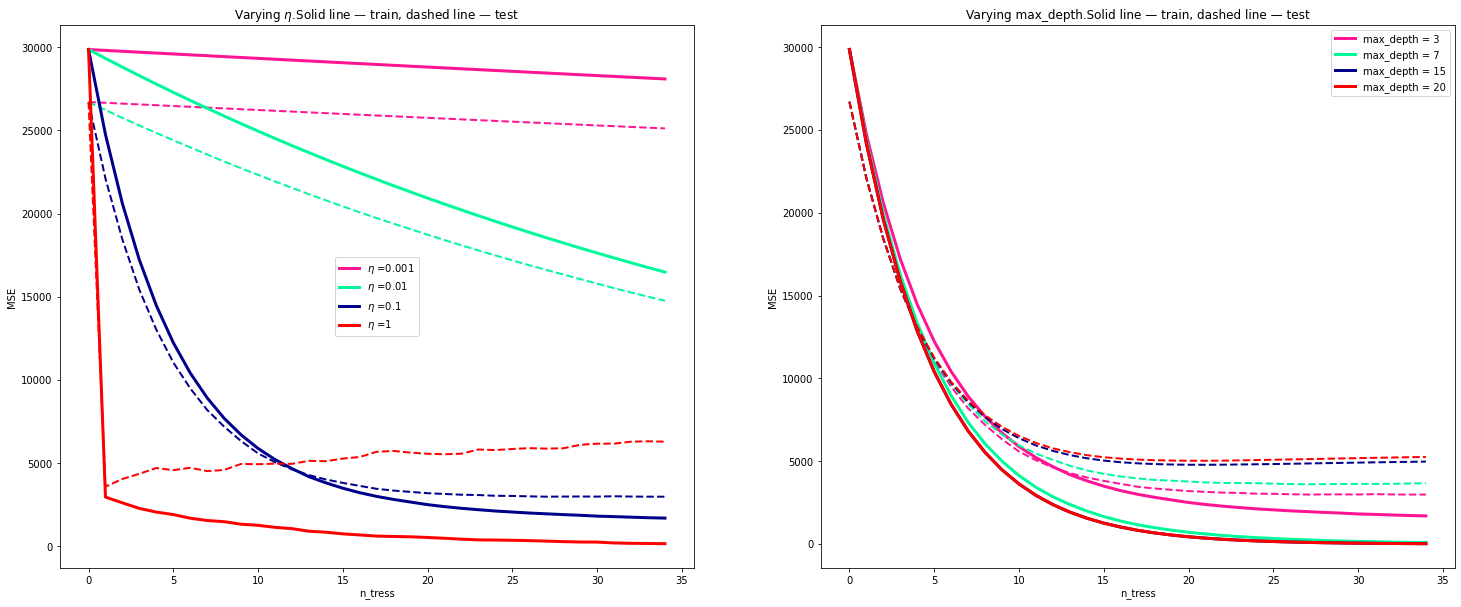

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].set_xlabel('n_tress')
ax[0].set_ylabel('MSE')
ax[0].set_title(r'Varying $\eta$.Solid line — train, dashed line — test')

ax[1].set_xlabel('n_tress')
ax[1].set_ylabel('MSE')
ax[1].set_title('Varying max_depth.Solid line — train, dashed line — test')

for eta, c in zip(etas, colors):
    gbr = GradientBoostingRegressor(n_trees, max_depth=3, eta=eta)
    gbr.fit(X_train, X_test, y_train, y_test)
    ax[0].plot(gbr.train_errors, label = r'$\eta$ ={}'.format(str(eta)), color = c, linewidth = 3)
    ax[0].plot(gbr.test_errors, color = c, linewidth = 2, linestyle = 'dashed')
    
for max_depth, c in zip(max_depth, colors):
    gbr = GradientBoostingRegressor(n_trees, max_depth=max_depth, eta=0.1)
    gbr.fit(X_train, X_test, y_train, y_test)
    ax[1].plot(gbr.train_errors, label = fr'max_depth = {max_depth}', color = c, linewidth = 3)
    ax[1].plot(gbr.test_errors, color = c, linewidth = 2, linestyle = 'dashed')
    
ax[0].legend()
ax[1].legend()

* Оптимальным значением, при постоянной глубине дерева, оказалось $\eta$ = 0.1. Стоит отметить, что, если деревьев в ансамбле недостаточно, то велика вероятность underfitting'а. Достаточное количество деревьев зависит от шага градиентного бустинга. Графики MSE на тестовом датасете при $\eta$ = {0.01, 0.001} наглядно это демонстрируют.

* С увеличением глубины дерева, требуется меньшее количество деревьев в ансамбле, т.к. MSE уменьшается быстрее. Тем не менее, оптимальным значением этого параметра оказалось <b>max_depth</b> = 3: хоть MSE на обучающем датасете уменьшается значительно медленнее при добавлении нового дерева в ансамбль, зато на тесте MSE получается самое минимальное.

$$\text{GridSearchCV}$$

In [11]:
from sklearn.model_selection import GridSearchCV

In [87]:
gbr_skl = GradientBoostingRegressor_SKL()
params = {'n_trees': np.arange(10, 31),
          'max_depth': np.arange(1, 10),
          'eta': np.logspace(-2, -1, 2)}
clf = GridSearchCV(gbr_skl, param_grid = params, cv=3)
clf.fit(X, y)
clf.best_params_, clf.best_score_


({'eta': 0.1, 'max_depth': 2, 'n_trees': 30}, -3368.269191582087)

* Оптимальные параметры $$\eta= 0.1$$, $$\text{max depth} = 2$$, $$\text{n_trees} = 30$$, $$\text{MSE} = 3368.27$$

### <b> Interactive

In [18]:
global X_train, X_test, y_train, y_test

def get_error_plot(n_trees = 30, max_depth = 2, eta = 0.1):
    gbr = GradientBoostingRegressor(n_trees, max_depth, eta)
    gbr.fit(X_train, X_test, y_train, y_test)
    plt.figure(figsize=(13,7))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(gbr.train_errors, label=fr'train error, n_trees = {n_trees}, max_d = {max_depth}, $\eta$ ={eta}', linewidth = 3, color = '#DC143C')
    plt.plot(gbr.test_errors, label=fr'test error, n_trees = {n_trees}, max_d = {max_depth}, $\eta$ ={eta}', linewidth = 3, color = '#00FA9A')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
w = widgets.interact(get_error_plot, n_trees = (1, 100, 1), max_depth = (1, 20, 1), eta = [10**(-3), 10**(-2), 10**(-1), 10**(0)]);

interactive(children=(IntSlider(value=30, description='n_trees', min=1), IntSlider(value=2, description='max_d…

### <b> Task №2

In [66]:
n_trees = 35
etas = [1e-3, 1e-2, 1e-1, 1]
max_depths= [3, 7, 15]

colors = ['#DC143C', '#00FA9A']


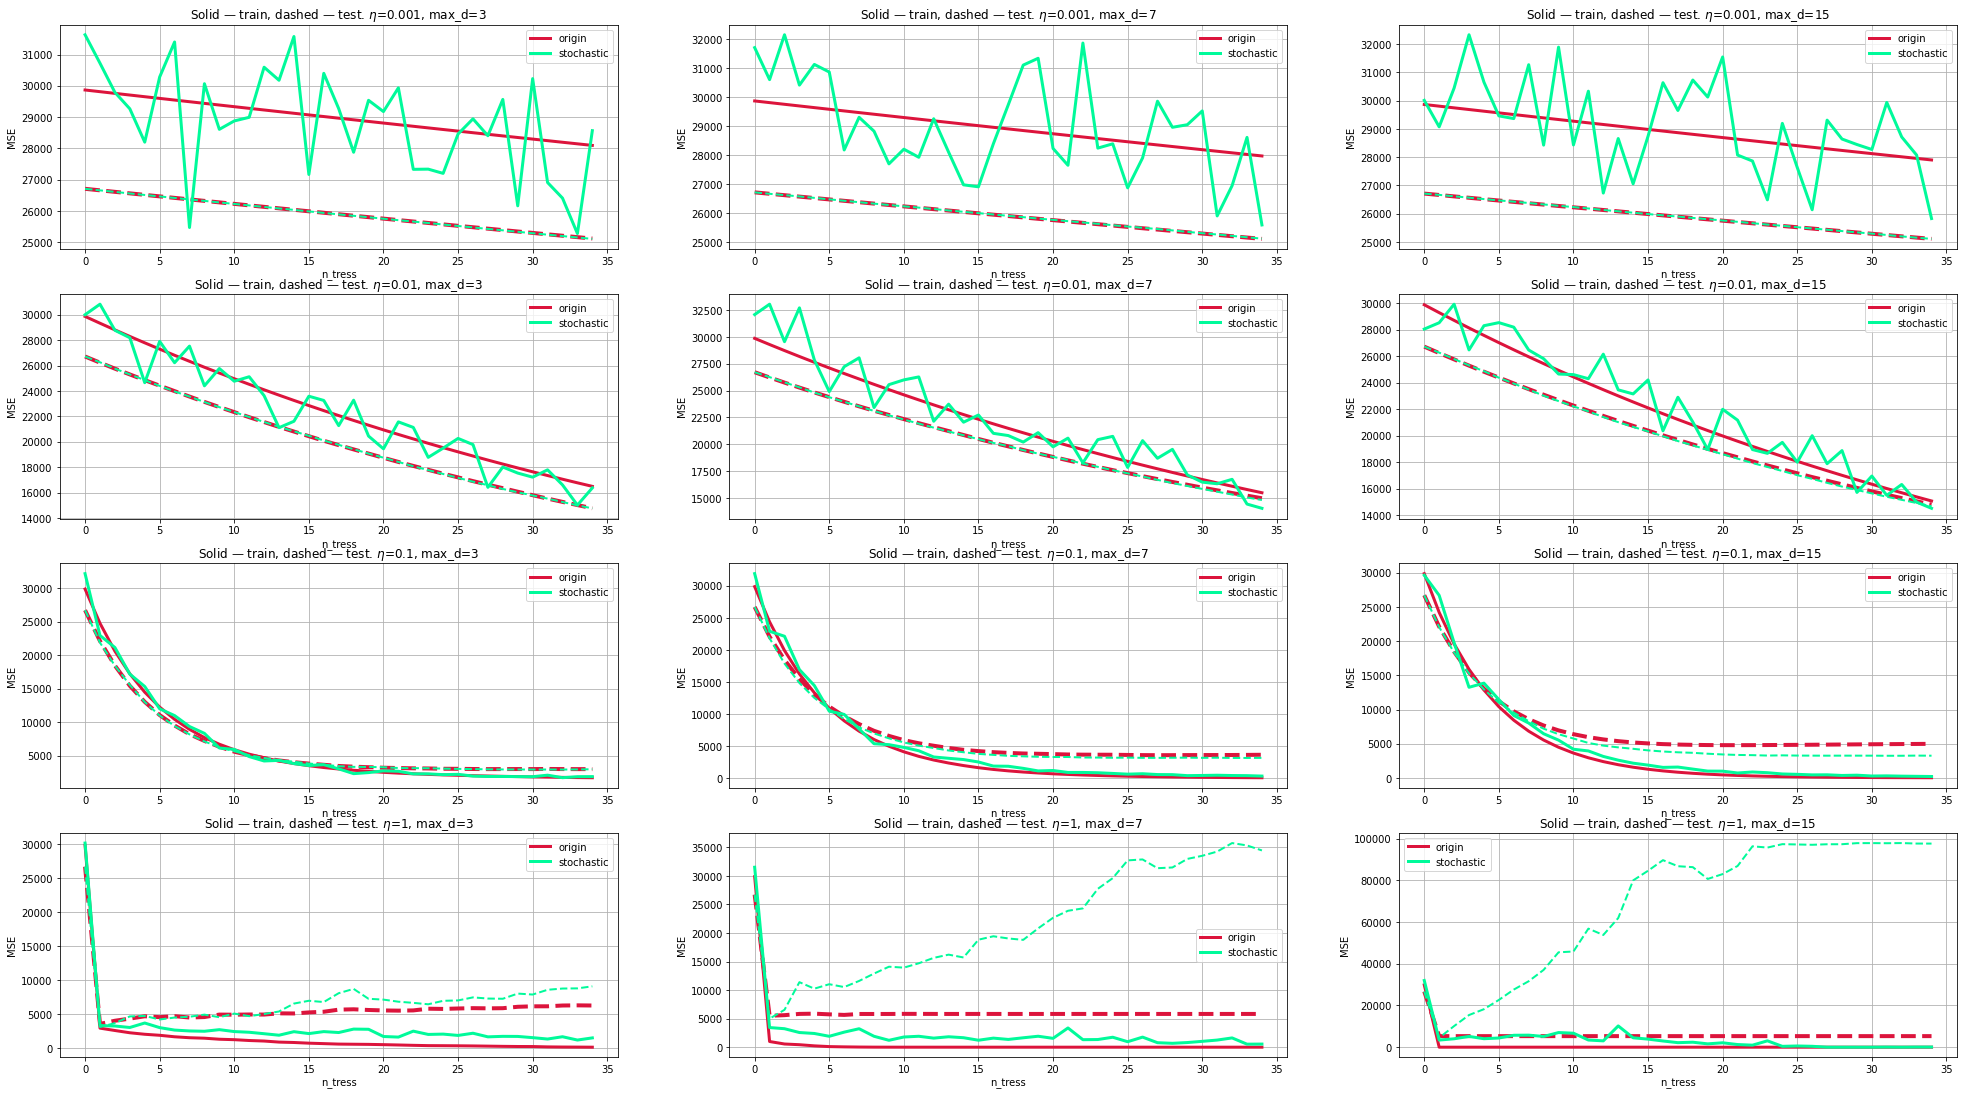

In [67]:
n, m = len(etas), len(max_depths)
fig, ax = plt.subplots(n, m, figsize = (7*n+2*(n-1), 5*m+2*(m-1)))

for i, eta in enumerate(etas):
    for j, max_depth in enumerate(max_depths):
        gbr = GradientBoostingRegressor(n_trees, max_depth, eta)
        gbr_st = StochasticGradientBoostingRegressor(n_trees, max_depth, eta, sample_size = 0.5)
        
        gbr.fit(X_train, X_test, y_train, y_test)
        gbr_st.fit(X_train, X_test, y_train, y_test)                  

        ax[i, j].plot(gbr.train_errors, label = 'origin', color = colors[0], linewidth = 3)
        ax[i, j].plot(gbr.test_errors, color = colors[0], linewidth = 4, linestyle = 'dashed')
        
        ax[i, j].plot(gbr_st.train_errors, label = 'stochastic', color = colors[1], linewidth = 3)
        ax[i, j].plot(gbr_st.test_errors, color = colors[1], linewidth = 2, linestyle = 'dashed')
        
        ax[i, j].set_xlabel('n_tress')
        ax[i, j].set_ylabel('MSE')
        ax[i, j].set_title(r'Solid — train, dashed — test. $\eta$={}, max_d={}'.format(eta, max_depth))
        ax[i, j].grid()
        ax[i, j].legend()
        

* При $\eta = [10^{-3}, 10^{-2}]$ оба метода не смогли обучиться. 
* При $\eta = 1$ стохастический градиентный спуск практически сразу выходил на ситуацию с переобучением.
* Ситуация с $\eta = 10^{-1}$ заслуживает отдельного внимания. На всех графиках ошибки стохастического градиентного спуска, где параметр $\eta \in [10^{-3}, 10^{-2}]$, можно увидеть насколько нестабильно изменяется MSE (на train), но при оптимальном значении этого гиперпараметра метод показал себя лучше, чем классический градиентный бустинг. Особенно, если принять во внимание тот факт, что каждое дерево в ансамбле обучалось лишь на половине объектов! 

### <b> Task №3

$$\text{Node}$$

In [80]:
class Node:
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index
        self.t = t
        self.true_branch = true_branch
        self.false_branch = false_branch


$$\text{Leaf for regression}$$

In [81]:
class Leaf:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.leaf_label = None
        self.prediction = self.predict()

    def predict(self):
        if self.leaf_label is None:            
            classes = {}
            for label in self.labels:
                if label not in classes:
                    classes[label] = 1
                else:
                    classes[label] += 1
            self.leaf_label = max(classes, key=classes.get)    
        return self.leaf_label

In [82]:
class Leaf_Regressor(Leaf):
    def predict(self):
        if self.leaf_label is None:            
            self.leaf_label = np.mean(self.labels)  
        return self.leaf_label

$$\text{Decision Tree Regressor}$$

In [90]:
class Decision_Tree_Regressor:
    def __init__(self, criterion = 'dispersion', max_depth = None, min_samples_leaf = 1, min_dispersion_decrease = 0.0, homogeneous_leaf = True):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_dispersion_decrease = min_dispersion_decrease
        self.homogeneous_leaf = homogeneous_leaf
        self.current_depth = 0
        
    def informative_criteria(self, labels): 
        if self.criterion == 'dispersion':
            if len(labels) == 1:
                impurity = 0
            else:                
                impurity = np.var(labels, ddof = 1)
        return impurity
    
    def quality(self, left_labels, right_labels, current_information):
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        
        return current_information - p * self.informative_criteria(left_labels) - (1 - p) * self.informative_criteria(right_labels)
    
    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels)
        
    def build_tree(self, data, labels):        
        quality, t, idx = self.find_best_split(data, labels)
        
        if quality == 0 or (len(set(labels)) == 1 and homogeneous_leaf):
            return Leaf_Regressor(data, labels)
        
        self.current_depth += 1
        
        true_data, false_data, true_labels, false_labels = self.split(data, labels, idx, t)
        
        if self.current_depth == self.max_depth:
            true_branch = Leaf_Regressor(true_data, true_labels)
            false_branch = Leaf_Regressor(false_data, false_labels)
            self.current_depth -= 1
            
        else:
            true_branch = self.build_tree(true_data, true_labels)
            false_branch = self.build_tree(false_data, false_labels)
        
        return Node(idx, t, true_branch, false_branch)
    
    def split(self, data, labels, idx, t):
        left_mask = data[:, idx] <= t
        
        true_data = data[left_mask]        
        true_labels = labels[left_mask]
        
        false_data = data[~left_mask]
        false_labels = labels[~left_mask]
        
        return true_data, false_data, true_labels, false_labels

    def find_best_split(self, data, labels):
        current_information = self.informative_criteria(labels)
        
        best_quality = 0
        best_t = None
        best_idx = None
        
        n_features = data.shape[1]
        
        for idx in range(n_features):
            t_values = np.unique(data[:, idx])
            
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, idx, t)
                
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue
                
                current_quality = self.quality(true_labels, false_labels, current_information)
                
                if current_quality > best_quality and abs(current_quality - best_quality) > self.min_dispersion_decrease:
                    best_quality, best_t, best_idx = current_quality, t, idx
                
        return best_quality, best_t, best_idx
    
    def classify_object(self, obj, node):
        if isinstance(node, Leaf_Regressor):
            return node.prediction
        
        if obj[node.index] <= node.t:
            return self.classify_object(obj, node.true_branch)
        else:
            return self.classify_object(obj, node.false_branch)
        
    def predict(self, data):
        predictions = np.zeros(len(data))
        for i, obj in enumerate(data):
            predictions[i] = self.classify_object(obj, self.tree)
        return predictions
            

$$\text{Gradient Boosting Regressor with a different approach when building a tree}$$

In [84]:
class GradientBoostingRegressor_DiffTree():
    def __init__(self, n_trees = 1, max_depth = 3, eta = 1, random_state = 42):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.random_state = random_state
        self.eta = eta                      #learning rate
        
    def bias(self, y, z):
        return (y - z)
    
    def mse(self, y, y_pred):
        return (sum((y - y_pred)**2)) / len(y)
            
    def predict(self, X):         
        return np.array([sum([self.eta * coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coeffs)]) for x in X])
        
    
    def fit(self, X_train, X_test, y_train, y_test):
        self.coeffs = np.ones(self.n_trees)
        
        self.trees = []                
        self.train_errors = []
        self.test_errors = []       
        
        
        tree = Decision_Tree_Regressor(max_depth=self.max_depth)
        tree.fit(X_train, y_train)        
        self.train_errors.append(self.mse(y_train, self.predict(X_train)))
        self.test_errors.append(self.mse(y_test, self.predict(X_test)))        
        self.trees.append(tree)
        
        for _ in range(1, self.n_trees):
            tree = Decision_Tree_Regressor(max_depth=self.max_depth)
            
            tree.fit(X_train, self.bias(y_train, self.predict(X_train)))            
            
            self.train_errors.append(self.mse(y_train, self.predict(X_train)))
            self.test_errors.append(self.mse(y_test, self.predict(X_test)))   
            
            self.trees.append(tree)
        self.train_errors = np.array(self.train_errors)
        self.test_errors = np.array(self.test_errors)
        
        

In [85]:
n_trees = 35
etas = [1e-3, 1e-2, 1e-1, 1]
max_depths= [3, 7, 15]

colors = ['#DC143C', '#00FA9A']


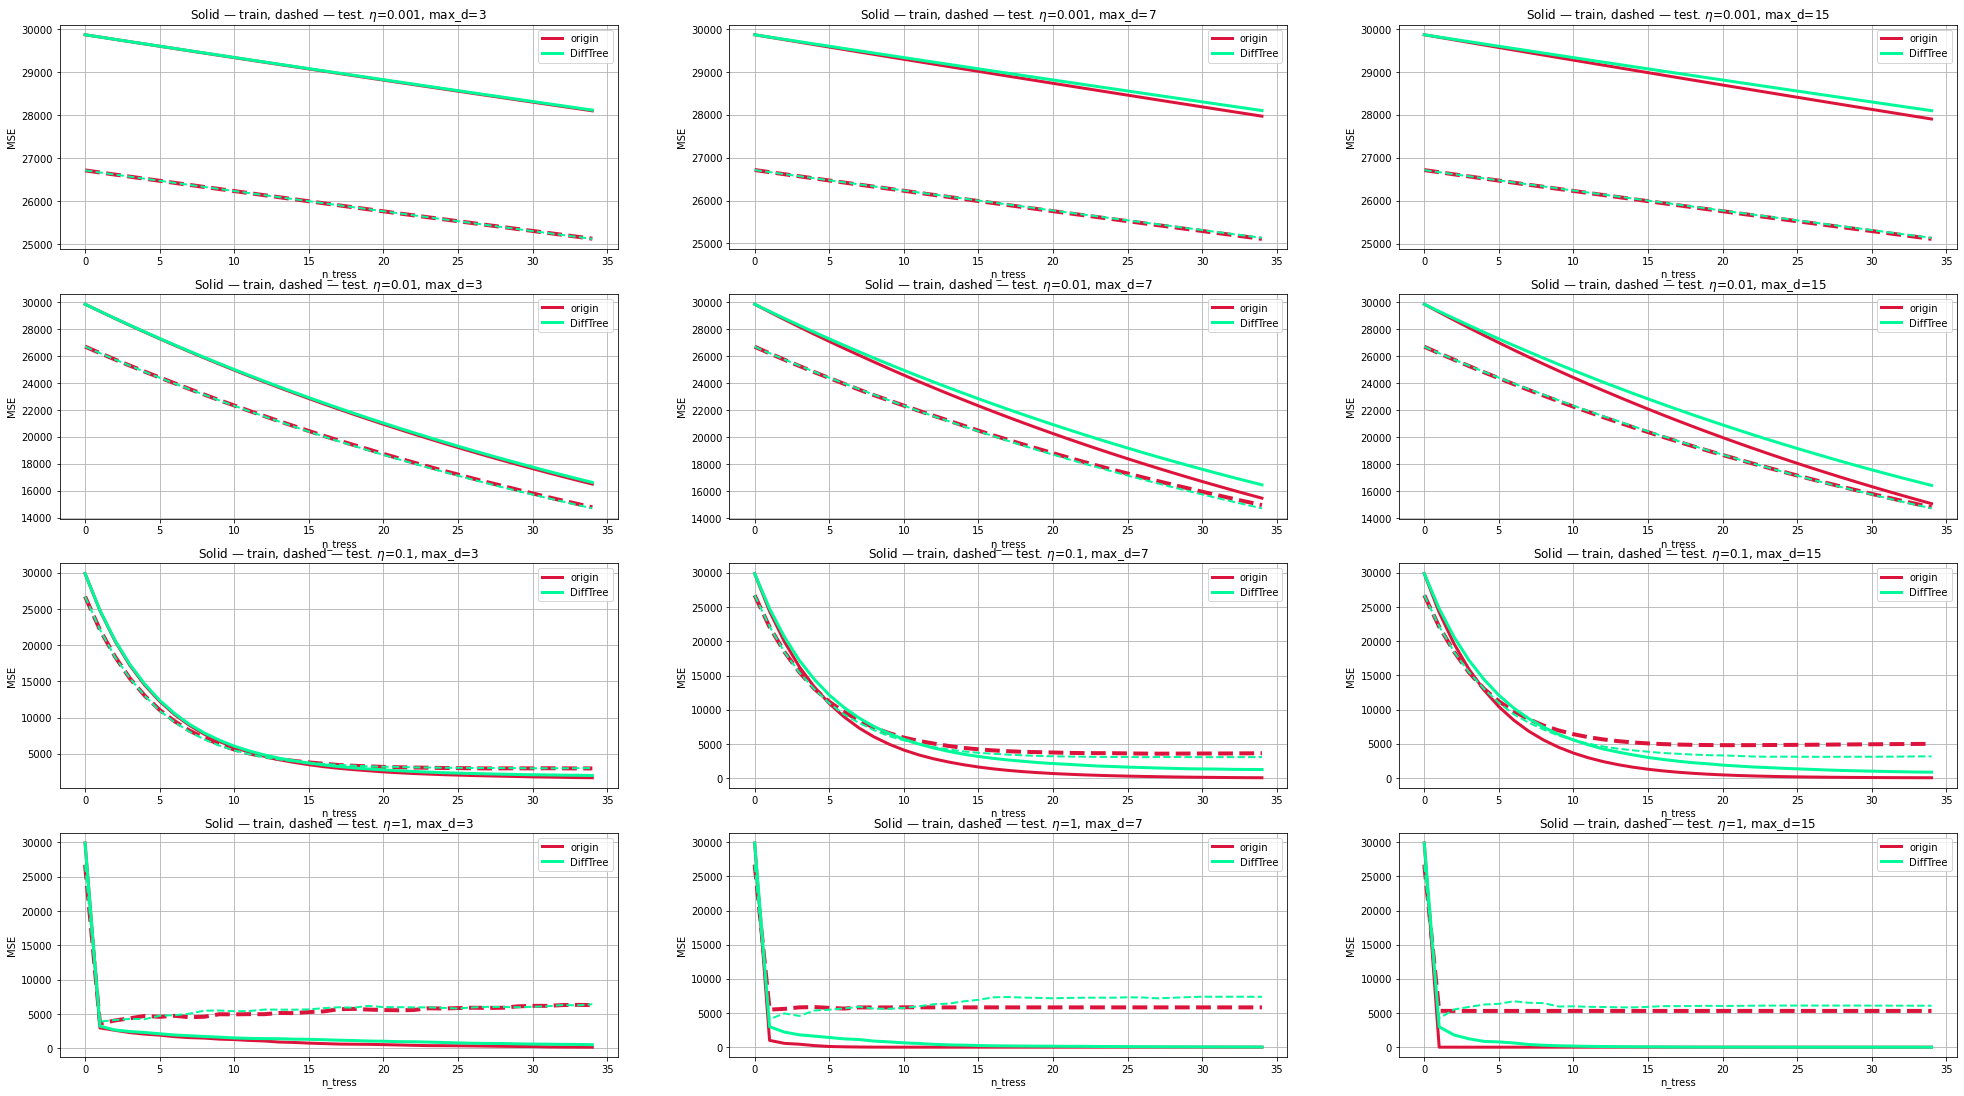

In [86]:
n, m = len(etas), len(max_depths)
fig, ax = plt.subplots(n, m, figsize = (7*n+2*(n-1), 5*m+2*(m-1)))

for i, eta in enumerate(etas):
    for j, max_depth in enumerate(max_depths):
        gbr = GradientBoostingRegressor(n_trees, max_depth, eta)
        gbr_dt = GradientBoostingRegressor_DiffTree(n_trees, max_depth, eta)
        
        gbr.fit(X_train, X_test, y_train, y_test)
        gbr_dt.fit(X_train, X_test, y_train, y_test)                  

        ax[i, j].plot(gbr.train_errors, label = 'origin', color = colors[0], linewidth = 3)
        ax[i, j].plot(gbr.test_errors, color = colors[0], linewidth = 4, linestyle = 'dashed')
        
        ax[i, j].plot(gbr_dt.train_errors, label = 'DiffTree', color = colors[1], linewidth = 3)
        ax[i, j].plot(gbr_dt.test_errors, color = colors[1], linewidth = 2, linestyle = 'dashed')
        
        ax[i, j].set_xlabel('n_tress')
        ax[i, j].set_ylabel('MSE')
        ax[i, j].set_title(r'Solid — train, dashed — test. $\eta$={}, max_d={}'.format(eta, max_depth))
        ax[i, j].grid()
        ax[i, j].legend()
        

* Результаты качественно похожи между собой. Наверное, различие достигается за счет реализаций. В DecisionTreeRegressor, реализованной в scikit-learn, при построении дерева в качестве критерия информативности принята MSE, в то время как в собственной реализации задействована дисперсия, но это не сильно влияет на построение дерева. В собственной реализации нет параметров, которые можно обнаружить в дереве из scikit-learn. Например: min_impurity_split, min_samples_split. Механизм предсказания у этих реализаций совпадают.